In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Helper function
def add_front_padding(x):
    zipcode = str(x)
    while len(zipcode) < 5:
        zipcode = "0"+zipcode
    return zipcode

In [8]:
data = pd.read_csv("../data/weighted_merged_all.csv", converters={'Zip' : lambda x: add_front_padding(x)})
data = data.set_index('Zip')
data

,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,...,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_pop2,STATE,ZIP_TYPE,RUCA1,RUCA2
Zip,,,,,,,,,,,,,,,,,,,,,
29639,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,93.12,223.75,...,15.151199,17.506064,88.950971,86.189438,100.000000,4306.115164,SC,Zip Code Area,6.0,6.0
29620,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,212.50,536.35,...,14.892564,19.287297,93.098385,81.591357,100.000000,5274.299089,SC,Zip Code Area,4.0,4.0
29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.478883,14.745884,100.000000,83.900000,100.000000,3464.000000,SC,Zip Code Area,2.0,2.0
29638,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,82.79,222.35,...,10.668091,18.680260,93.406966,84.480742,100.000000,3849.135001,SC,Zip Code Area,6.0,6.0
29628,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,51.12,126.06,...,10.390630,21.713915,97.927401,78.157411,100.000000,2748.179543,SC,Zip Code Area,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78839,3.0,3.0,11.0,1.0,1.0,4.0,1.0,1392.0,48.94,191.14,...,19.070245,27.109253,95.447426,75.592370,99.127211,5622.838142,TX,Zip Code Area,7.0,7.0
78872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.963747,25.174920,99.962206,59.619735,99.946457,1614.839963,TX,Zip Code Area,5.0,5.0
57622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.742706,34.482759,88.700000,59.700000,97.300000,2791.000000,SD,Zip Code Area,10.0,10.0


In [5]:
data.columns

Index(['Zip', 'WiredCount_2020', 'Fwcount_2020', 'AllProviderCount_2020',
       'Wired25_3_2020', 'Wired100_3_2020', 'All25_3_2020', 'All100_3',
       'TestCount', 'AverageMbps', 'FastestAverageMbps',
       '%Access to Terrestrial Broadband',
       'Lowest Priced Terrestrial Broadband Plan', 'WiredCount_2015',
       'Fwcount_2015', 'AllProviderCount_2015', 'Wired25_3_2015',
       'Wired100_3_2015', 'All25_3_2015', 'All100_3.1',
       'Total_Enrolled_Households', 'ST', 'COUNTY NAME', 'BROADBAND USAGE',
       'ERROR RANGE (MAE)(+/-)', 'ERROR RANGE (95%)(+/-)', 'MSD',
       'median_age_overall', 'median_age_male', 'median_age_female',
       'employment_rate', 'median_income', 'total_households',
       'ave_household_size', 'ave_family_size', 'total_population',
       'median_house_value', 'pct_white', 'pct_hisp_latino', 'pct_black',
       'pct_native', 'pct_asian', 'pct_hi_pi', 'pct_other_race',
       'pct_two+_race', 'pct_rent_burdened', 'poverty_rate',
       'pct_pop_bach

In [32]:
eda_df = data[['employment_rate','pct_computer','pct_computer_with_dialup', 'pct_computer_with_broadband', 'pct_computer_no_internet', 'pct_no_computer',
               'pct_health_ins_children', 'pct_health_ins_19_64', 'pct_health_ins_65+','RUCA1', 'RUCA2',
              'median_age_overall', 'median_age_male', 'median_age_female']]
eda_df

,employment_rate,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,RUCA1,RUCA2,median_age_overall,median_age_male,median_age_female
Zip,,,,,,,,,,,,,,
29639,51.574744,82.493936,0.074843,67.267894,15.151199,17.506064,88.950971,86.189438,100.000000,6.0,6.0,37.550512,33.269798,43.424797
29620,52.052838,80.712703,0.000575,65.819564,14.892564,19.287297,93.098385,81.591357,100.000000,4.0,4.0,44.969110,43.936586,45.418218
29659,46.100000,85.254116,0.000000,61.775233,23.478883,14.745884,100.000000,83.900000,100.000000,2.0,2.0,48.500000,48.400000,48.800000
29638,50.489605,81.319740,0.404128,70.247521,10.668091,18.680260,93.406966,84.480742,100.000000,6.0,6.0,41.227244,39.474290,43.531624
29628,43.352088,78.286085,0.000000,67.895454,10.390630,21.713915,97.927401,78.157411,100.000000,5.0,5.0,42.128810,36.462735,47.271399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78839,49.033970,72.890747,0.701018,53.119484,19.070245,27.109253,95.447426,75.592370,99.127211,7.0,7.0,32.527983,31.908158,32.866391
78872,39.718686,74.825080,0.000000,38.861333,35.963747,25.174920,99.962206,59.619735,99.946457,5.0,5.0,37.351554,35.055753,45.319272
57622,47.000000,65.517241,0.000000,54.774536,10.742706,34.482759,88.700000,59.700000,97.300000,10.0,10.0,33.100000,33.200000,32.500000


In [33]:
# key stats
eda_df.describe()

,employment_rate,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,RUCA1,RUCA2,median_age_overall,median_age_male,median_age_female
count,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32642.000000,32638.000000,32638.000000,32642.000000,32642.000000,32642.000000
mean,56.166661,86.890113,0.576109,76.941632,9.372373,12.977543,94.352333,87.647764,99.000236,4.315522,4.321812,42.406450,41.387721,43.408586
std,9.844336,7.710745,0.741055,10.815545,5.070274,7.304863,6.589138,8.300279,5.467268,3.560467,3.566864,6.618908,6.833826,6.794769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,50.637337,83.031423,0.099420,71.013216,5.951846,7.772878,92.671398,83.583979,99.355527,1.000000,1.000000,38.530730,37.225901,39.418279
50%,57.505249,87.718510,0.379075,77.733564,8.545640,12.236889,96.237868,89.702036,99.980057,2.000000,2.000000,42.421868,41.200000,43.627279
75%,63.070634,92.185398,0.818442,84.456062,11.807009,16.899733,98.308380,93.565862,100.000000,8.000000,8.000000,46.224043,45.400000,47.499113
max,100.000000,100.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,99.000000,82.100000,81.800000,82.200000


In [34]:
#check na
check_na = eda_df.isnull().sum()
check_na

employment_rate                11
pct_computer                   11
pct_computer_with_dialup       11
pct_computer_with_broadband    11
pct_computer_no_internet       11
pct_no_computer                11
pct_health_ins_children        11
pct_health_ins_19_64           11
pct_health_ins_65+             11
RUCA1                          15
RUCA2                          15
median_age_overall             11
median_age_male                11
median_age_female              11
dtype: int64

In [35]:
total_num = len(eda_df.index)
total_num

32653

In [36]:
#check na percentage
check_na_percentage = check_na/total_num
check_na_percentage

employment_rate                0.000337
pct_computer                   0.000337
pct_computer_with_dialup       0.000337
pct_computer_with_broadband    0.000337
pct_computer_no_internet       0.000337
pct_no_computer                0.000337
pct_health_ins_children        0.000337
pct_health_ins_19_64           0.000337
pct_health_ins_65+             0.000337
RUCA1                          0.000459
RUCA2                          0.000459
median_age_overall             0.000337
median_age_male                0.000337
median_age_female              0.000337
dtype: float64

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


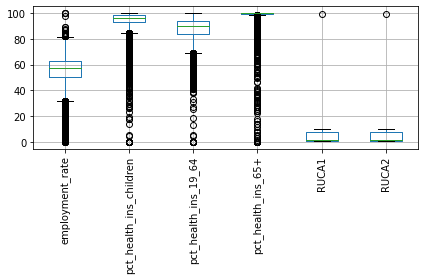

In [37]:
eda_df[['employment_rate','pct_health_ins_children', 'pct_health_ins_19_64', 'pct_health_ins_65+','RUCA1', 'RUCA2',]].boxplot()
plt.xticks(rotation = 90)
plt.tight_layout()

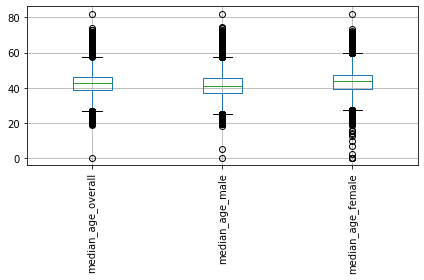

In [31]:
eda_df[['median_age_overall', 'median_age_male', 'median_age_female']].boxplot()
plt.xticks(rotation = 90)
plt.tight_layout()

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


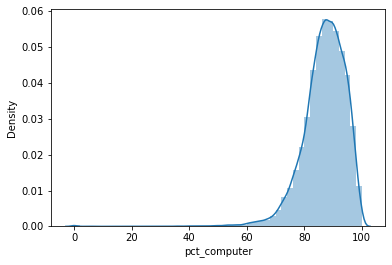

In [24]:
sns.distplot(eda_df['pct_computer'])

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


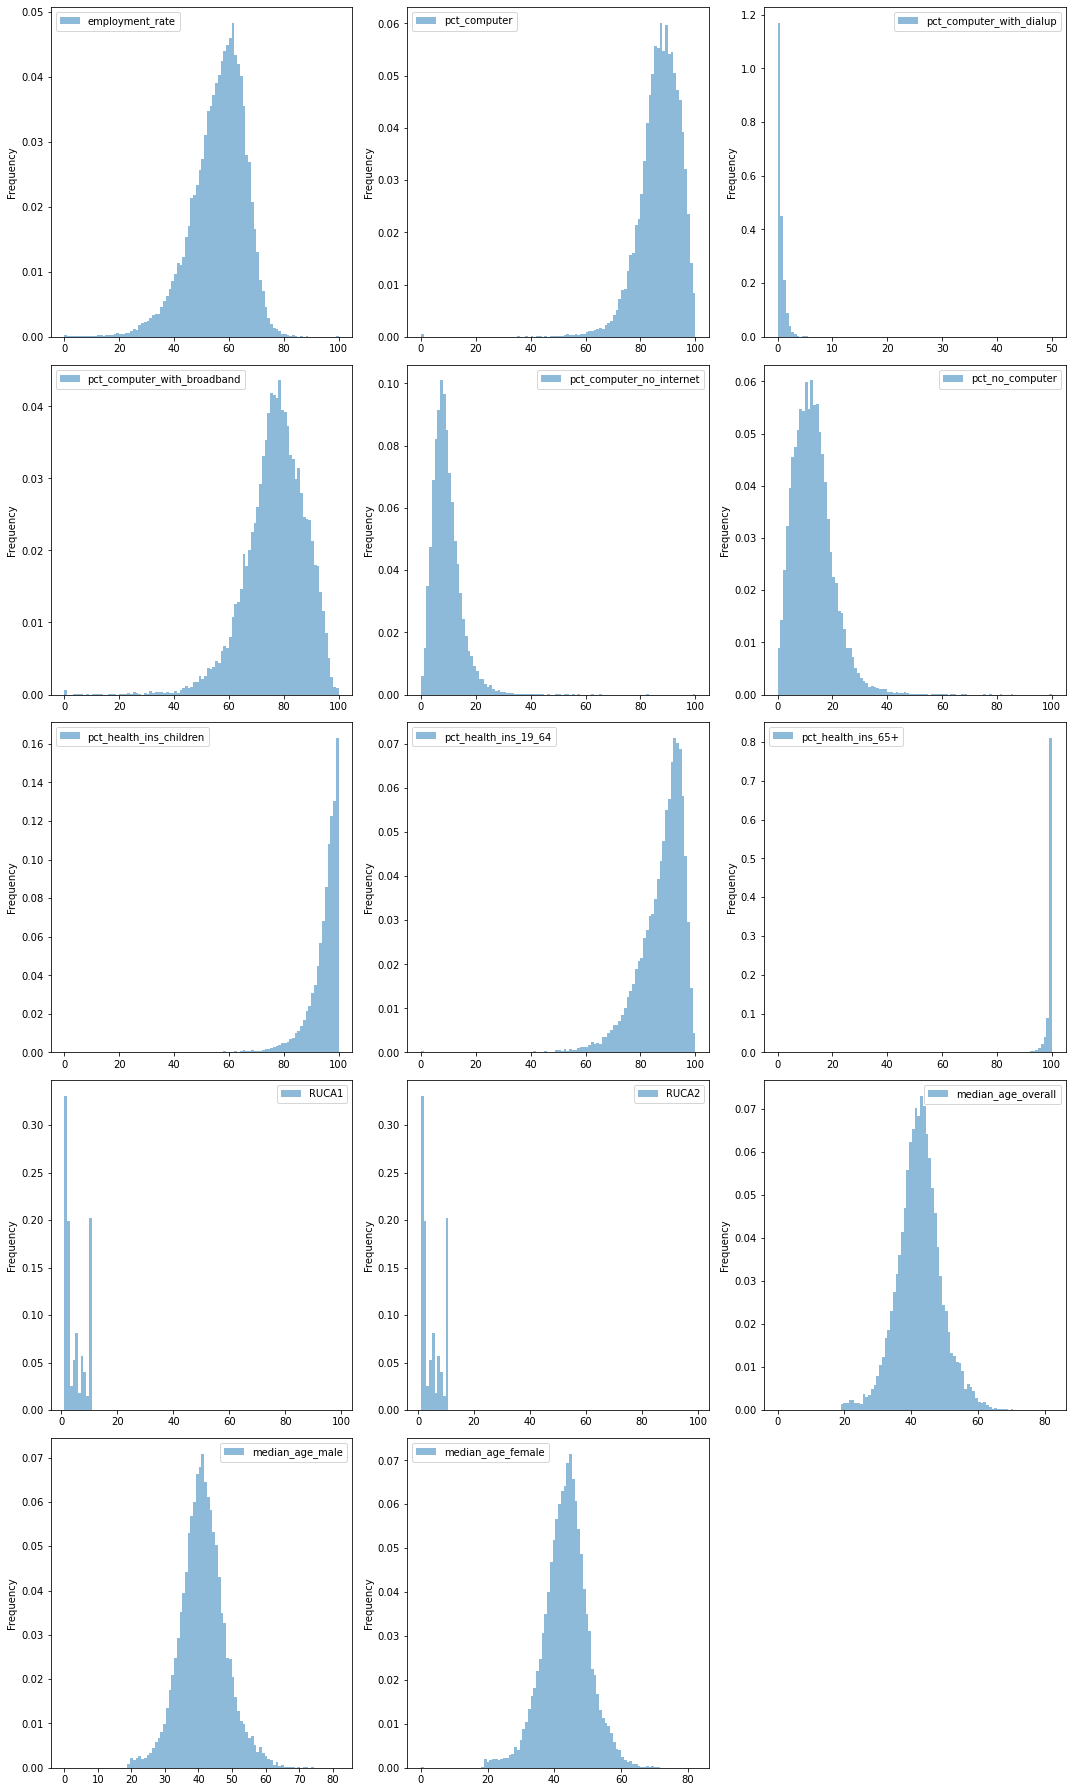

In [38]:
plt.figure(figsize=(15, 25))
plt.grid()
counter = 0
for col in eda_df.columns:
    counter = counter + 1
    axis = plt.subplot(5, 3, counter)
    df = eda_df[col].to_frame()
    df.plot.hist(density=True, bins = 100, ax=axis, alpha=0.5)
    
plt.tight_layout()

In [39]:
eda_df.skew()

employment_rate                -0.870614
pct_computer                   -2.089182
pct_computer_with_dialup       12.290702
pct_computer_with_broadband    -1.004506
pct_computer_no_internet        1.715613
pct_no_computer                 1.291983
pct_health_ins_children        -3.959491
pct_health_ins_19_64           -1.761280
pct_health_ins_65+            -14.839049
RUCA1                           1.168969
RUCA2                           1.167362
median_age_overall             -0.007875
median_age_male                 0.157288
median_age_female              -0.218038
dtype: float64

In [40]:
eda_df.kurtosis()

employment_rate                  1.675284
pct_computer                    14.097796
pct_computer_with_dialup       641.850474
pct_computer_with_broadband      3.185691
pct_computer_no_internet         9.466315
pct_no_computer                  4.997397
pct_health_ins_children         31.440906
pct_health_ins_19_64             6.670644
pct_health_ins_65+             246.119399
RUCA1                           14.001233
RUCA2                           13.890545
median_age_overall               1.085615
median_age_male                  0.946901
median_age_female                1.244522
dtype: float64